In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from pathlib import Path

notebook_path = "/u/skarmakar1/version_check/llm_steering-main/sk"
sys.path.append(notebook_path)

In [3]:
import torch
import numpy as np

from inversion_utils import *
import pickle
from sklearn.model_selection import train_test_split

In [4]:
SEED = 0

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
np.random.seed(SEED)

torch.backends.cudnn.benchmark = True 
torch.backends.cuda.matmul.allow_tf32 = True

LLM = namedtuple('LLM', ['language_model', 'tokenizer', 'processor', 'name', 'model_type'])

In [5]:
model_type = 'llama'
# model_type = 'qwen'

# MODEL_VERSION = '3'
MODEL_VERSION = '3.1'
# MODEL_VERSION = '3.3'

MODEL_SIZE = '8B'
# MODEL_SIZE = '70B'

llm = select_llm(model_type, MODEL_VERSION=MODEL_VERSION, MODEL_SIZE=MODEL_SIZE)

Loading meta-llama/Meta-Llama-3.1-8B-Instruct


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
with open("../data/moods/all_antonym_pairs.pkl", 'rb') as file:
    all_e = pickle.load(file)

In [7]:
print("Total data:", len(all_e))
print(all_e[:5])

train_data_t, test_data = train_test_split(all_e, test_size=0.1, random_state=SEED)

print("Training data normal:", len(train_data_t))
print(train_data_t[:5])

swap_train_data = [(b, a) for a, b in train_data_t]
print("Training data swapped:", len(swap_train_data))
print(swap_train_data[:5])

train_data = train_data_t + swap_train_data
print("Training data:", len(train_data))
print(train_data[:5])

print("Testing data:", len(test_data))
print(test_data[:5])

Total data: 239
[('optimistic', 'pessimistic'), ('enthusiastic', 'apathetic'), ('energetic', 'lethargic'), ('tense', 'relaxed'), ('confident', 'diffident')]
Training data normal: 215
[('delighted', 'disappointed'), ('sympathetic', 'unsympathetic'), ('burdened', 'unburdened'), ('lighthearted', 'somber'), ('insincere', 'sincere')]
Training data swapped: 215
[('disappointed', 'delighted'), ('unsympathetic', 'sympathetic'), ('unburdened', 'burdened'), ('somber', 'lighthearted'), ('sincere', 'insincere')]
Training data: 430
[('delighted', 'disappointed'), ('sympathetic', 'unsympathetic'), ('burdened', 'unburdened'), ('lighthearted', 'somber'), ('insincere', 'sincere')]
Testing data: 24
[('surprised', 'unsurprised'), ('hasty', 'careful'), ('evasive', 'direct'), ('pretentious', 'unpretentious'), ('confrontational', 'diplomatic')]


In [8]:
X_train, Y_train = read_tuples(llm, train_data, path='../directions_moods_plus_llama/')

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

D

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components

/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components

In [9]:
X_test, Y_test = read_tuples_as_list(llm, test_data, path='../directions_moods_plus_llama/')
print(test_data)

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

D

In [46]:
X_val_test, Y_val_test = read_tuples(llm, test_data, path='../directions_moods_plus_llama/')

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

Detector found
Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 16
M_batch_size         : 2048
n_components         : 1

D

/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [47]:
X_train_norm = {}
Y_train_norm = {}

X_val_test_norm = {}
Y_val_test_norm = {}

X_mean = {}
X_std = {}
Y_mean = {}
Y_std = {}

for layer in X_train:
    x_mean = X_train[-1].mean(dim=0, keepdim=True)
    x_std = X_train[-1].std(dim=0, keepdim=True) + 1e-8
    y_mean = Y_train[-1].mean(dim=0, keepdim=True)
    y_std = Y_train[-1].std(dim=0, keepdim=True) + 1e-8

    X_mean[layer] = x_mean
    X_std[layer] = x_std
    Y_mean[layer] = y_mean
    Y_std[layer] = y_std

    X_train_norm[layer] = (X_train[layer] - x_mean) / x_std
    Y_train_norm[layer] = (Y_train[layer] - y_mean) / y_std

    X_val_test_norm[layer] = (X_val_test[layer] - x_mean) / x_std
    Y_val_test_norm[layer] = (Y_val_test[layer] - y_mean) / y_std

Manifold Optimization

In [11]:
import geoopt

In [35]:
print(X_train_norm[-1].shape)
print(Y_train_norm[-1].shape)

x = X_train_norm[-1]
y = Y_train_norm[-1]

torch.Size([430, 4096])
torch.Size([430, 4096])


In [48]:
x_t = X_val_test_norm[-1]
y_t = Y_val_test_norm[-1]

In [41]:
print(x.mean(dim=0, keepdim=True))
print(x.std(dim=0, keepdim=True) + 1e-8)

tensor([[ 6.6535e-09,  9.4813e-08,  1.1089e-08,  ..., -1.1089e-08,
          2.6614e-08,  2.6614e-08]], device='cuda:0')
tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
       device='cuda:0')


In [44]:
d = x.shape[1]

manifold = geoopt.manifolds.Stiefel()
P_init = manifold.random(d, d, dtype=torch.float32)  # Proper Stiefel initialization
P = geoopt.ManifoldParameter(P_init.to("cuda"), manifold=manifold)

optimizer = geoopt.optim.RiemannianAdam([P], lr=1e-3)  # Increased lr since data is normalized
lambda_reg = 10.0  # Adjusted for normalized data

for epoch in range(100):
    optimizer.zero_grad()
    W = 2 * P @ P.T - torch.eye(d).to("cuda")
    
    # Least squares loss + L2 regularization
    data_loss = torch.norm(y - x @ W) ** 2
    reg_loss = lambda_reg * torch.norm(W, 'fro') ** 2
    loss = data_loss + reg_loss
    
    if epoch % 10 == 0:
        print(f"epoch: {epoch}, data: {data_loss.item():.4f}, reg: {reg_loss.item():.4f}")
    
    loss.backward()
    
    # Gradient clipping for extra safety
    torch.nn.utils.clip_grad_norm_([P], max_norm=1.0)
    
    optimizer.step()

A = 2 * P @ P.T - torch.eye(d).to("cuda")

epoch: 0, data: 3830405.2500, reg: 40956.1406
epoch: 10, data: 3830420.0000, reg: 40956.1406
epoch: 20, data: 3830414.2500, reg: 40956.1562
epoch: 30, data: 3830405.7500, reg: 40956.1133
epoch: 40, data: 3830411.0000, reg: 40956.1094
epoch: 50, data: 3830397.0000, reg: 40956.1914
epoch: 60, data: 3830389.7500, reg: 40956.1562
epoch: 70, data: 3830394.2500, reg: 40956.1641
epoch: 80, data: 3830401.7500, reg: 40956.1484
epoch: 90, data: 3830385.5000, reg: 40956.1680


In [63]:
xtx = x.T @ x
W_unconstrained = torch.linalg.solve(
    xtx + 10.0 * torch.eye(d).to("cuda"), 
    x.T @ y
)
# 1.0  - 139911.6562
# 10.0 - 133456.2031

unconstrained_loss = torch.norm(y - x @ W_unconstrained)
print(f"Unconstrained loss: {unconstrained_loss.item():.4f}")
unconstrained_val_loss = torch.norm(y_t - x_t @ W_unconstrained)
print(f"Unconstrained val loss: {unconstrained_val_loss.item():.4f}")

Unconstrained loss: 26.0879
Unconstrained val loss: 365.3166


In [45]:
print(f"Constrained (involution) loss: {data_loss.item():.4f}")

# Check how far unconstrained solution is from being an involution
W_squared = W_unconstrained @ W_unconstrained
involution_violation = torch.norm(W_squared - torch.eye(d).to("cuda"), 'fro')
print(f"Involution constraint violation: {involution_violation.item():.4f}")

Unconstrained loss: 680.5786
Constrained (involution) loss: 3830382.2500
Involution constraint violation: 60.6382


Invert with involutory constraint

In [11]:
print(X_train_norm[-1].shape)
print(Y_train_norm[-1].shape)

x = X_train_norm[-1]
y = Y_train_norm[-1]

torch.Size([430, 4096])
torch.Size([430, 4096])


In [12]:
# # Hyperparameters
# lambda_reg = 10.0
# lambda_inv = 0.1      # NEW: Involution penalty weight

# d = x.shape[1]
# identity = torch.eye(d).to("cuda")
# xtx = x.T @ x
# xty = x.T @ y

# # Initialize
# A = torch.linalg.solve(xtx + lambda_reg * identity, xty)
# A.requires_grad_(True)

# # Define objective function
# def objective(A_param):
#     # Data fitting term
#     data_loss = torch.norm(x @ A_param - y, p='fro') ** 2
    
#     # L2 regularization term
#     reg_loss = lambda_reg * torch.norm(A_param, p='fro') ** 2
    
#     # Involution penalty term: ||A^2 - I||^2
#     inv_loss = lambda_inv * torch.norm(A_param @ A_param - identity, p='fro') ** 2
    
#     return data_loss + reg_loss + inv_loss

# # Use L-BFGS optimizer (better for this problem than SGD)
# optimizer = torch.optim.LBFGS([A], lr=0.1, max_iter=20)

# def closure():
#     optimizer.zero_grad()
#     loss = objective(A)
#     loss.backward()
#     return loss

# # Optimize
# for iteration in range(10):  # Outer iterations
#     loss = optimizer.step(closure)
#     inv_error = torch.norm(A @ A - identity)
#     print(f"Iter {iteration}: loss={loss.item():.4f}, inv_error={inv_error.item():.6f}")

# A.requires_grad_(False)
# print(f"Final involution error: {torch.norm(A @ A - identity):.6f}")


In [13]:
print(x)
print(y)

tensor([[ 0.9776, -2.9618,  0.4722,  ..., -1.8523, -0.4136,  1.7110],
        [ 0.4740,  0.2497, -0.2247,  ...,  0.6161, -0.3363,  1.5035],
        [-0.3800,  0.4173,  0.3802,  ...,  0.9986,  0.2623,  0.0422],
        ...,
        [ 0.3103, -1.5643,  0.4502,  ...,  1.5980, -1.3296,  0.9085],
        [-1.1201, -3.0029,  0.4976,  ...,  1.2147, -0.7244, -0.6848],
        [-1.5209, -0.0449, -2.5569,  ...,  0.1781, -1.1896, -1.3363]],
       device='cuda:0')
tensor([[-2.9790e-01,  4.1584e-01, -9.4413e-01,  ...,  7.4820e-01,
         -4.3265e-01, -1.0077e+00],
        [-5.9220e-01, -9.5495e-01,  7.9206e-01,  ...,  1.2631e+00,
          5.7047e-01, -5.5555e-04],
        [ 1.2009e+00, -9.2102e-01,  7.6728e-01,  ...,  9.4158e-01,
         -4.2963e-01, -5.1291e-01],
        ...,
        [-1.0208e-03,  7.5864e-01, -1.0445e+00,  ...,  1.9510e-01,
          3.2325e-02, -1.8697e-01],
        [ 9.0761e-01, -4.7368e-03, -7.6206e-02,  ...,  5.3966e-01,
          5.3071e-02, -2.0924e-01],
        [ 2.01

In [17]:
# Hyperparameters
lambda_reg = 10.0      # Your existing L2 regularization
lambda_inv = 1.0       # NEW: Involution penalty weight
n_iterations = 5       # NEW: Number of penalty iterations

d = x.shape[1]
identity = torch.eye(d).to("cuda")

# Initial solution (your original code)
xtx = x.T @ x
A = torch.linalg.solve(xtx + lambda_reg * identity, x.T @ y)

# Penalty method: iteratively enforce T^2 = I
for iter in range(n_iterations):
    # Compute current involution violation: T^2 - I
    A_squared = A @ A
    violation = A_squared - identity

    print(A)
    print(A_squared)
    print(violation)
    # break
    
    # Gradient of penalty term: d/dA ||A^2 - I||^2 = 4*A*(A^2 - I)
    penalty_gradient = 4 * A @ violation
    
    # Augmented system that includes penalty
    # Original loss: ||Ax - y||^2 + lambda_reg*||A||^2
    # With penalty: ||Ax - y||^2 + lambda_reg*||A||^2 + lambda_inv*||A^2 - I||^2

    # print((x.T @ y).shape)
    # print(x.T @ y)
    print((penalty_gradient).shape)
    print(penalty_gradient)
    break
    
    # Modified right-hand side incorporates penalty gradient
    rhs = x.T @ y - lambda_inv * penalty_gradient
    
    # Solve the regularized system
    A = torch.linalg.solve(xtx + lambda_reg * identity, rhs)
    
    # Optional: print progress
    inv_error = torch.norm(A @ A - identity, p='fro')
    print(f"Iteration {iter+1}: Involution error = {inv_error:.6f}")

tensor([[-0.0007, -0.0154,  0.0013,  ..., -0.0094, -0.0107,  0.0121],
        [-0.0039, -0.0071,  0.0176,  ...,  0.0094, -0.0206,  0.0101],
        [ 0.0019,  0.0166, -0.0119,  ..., -0.0162,  0.0309,  0.0030],
        ...,
        [-0.0209,  0.0147, -0.0067,  ...,  0.0055,  0.0140,  0.0011],
        [-0.0002, -0.0120, -0.0059,  ..., -0.0041,  0.0076, -0.0176],
        [ 0.0067,  0.0139, -0.0011,  ...,  0.0071, -0.0059,  0.0032]],
       device='cuda:0')
tensor([[ 0.0814,  0.0060,  0.0063,  ...,  0.0024,  0.0080, -0.0061],
        [ 0.0053,  0.1114,  0.0006,  ..., -0.0030,  0.0069, -0.0070],
        [ 0.0052,  0.0022,  0.0852,  ..., -0.0023, -0.0027,  0.0056],
        ...,
        [ 0.0009, -0.0028, -0.0018,  ...,  0.1195, -0.0078, -0.0037],
        [ 0.0066,  0.0062, -0.0030,  ..., -0.0088,  0.1225,  0.0022],
        [-0.0073, -0.0087,  0.0082,  ..., -0.0018,  0.0009,  0.1181]],
       device='cuda:0')
tensor([[-9.1857e-01,  5.9869e-03,  6.2765e-03,  ...,  2.4081e-03,
          8.0383e

In [40]:
print(A)

tensor([[-0.0007, -0.0154,  0.0013,  ..., -0.0094, -0.0107,  0.0121],
        [-0.0039, -0.0071,  0.0176,  ...,  0.0094, -0.0206,  0.0101],
        [ 0.0019,  0.0166, -0.0119,  ..., -0.0162,  0.0309,  0.0030],
        ...,
        [-0.0209,  0.0147, -0.0067,  ...,  0.0055,  0.0140,  0.0011],
        [-0.0002, -0.0120, -0.0059,  ..., -0.0041,  0.0076, -0.0176],
        [ 0.0067,  0.0139, -0.0011,  ...,  0.0071, -0.0059,  0.0032]],
       device='cuda:0')


In [39]:
print(torch.max(A@A - identity))
print(torch.min(A@A - identity))
print(torch.norm(A@A - identity))

tensor(0.0358, device='cuda:0')
tensor(-0.9568, device='cuda:0')
tensor(60.6382, device='cuda:0')


In [54]:
eigenvaluest, _ = torch.lobpcg(A, k=20, largest=True)
eigenvaluesb, _ = torch.lobpcg(A, k=10, largest=False)
print(eigenvaluest)
print(eigenvaluesb)
print("*"*50)

tensor([1.0972, 1.0813, 1.0442, 1.0257, 1.0195, 1.0169, 1.0153, 1.0114, 1.0091,
        1.0073, 1.0065, 1.0050, 1.0032, 1.0001, 0.9996, 0.9962, 0.9955, 0.9903,
        0.9853, 0.9824], device='cuda:0')
tensor([-2.4943, -2.3426, -2.2598, -2.1122, -2.0299, -1.9348, -1.6963, -1.6192,
        -1.4630, -1.3971], device='cuda:0')
**************************************************


In [ ]:
eigenvalues, _ = torch.linalg.eigh(A)

ev, _ = torch.sort(eigenvalues)
print(ev)

tensor([-6.7275, -6.0637, -5.5649,  ...,  5.5269,  6.1046,  6.7117],
       device='cuda:0')


In [59]:
from scipy.linalg import eigh

In [ ]:
npeigen, _ = np.linalg.eigh(A.cpu().detach().numpy())

npev = np.sort(npeigen)
print(npev)

[-6.7274556 -6.063691  -5.5649223 ...  5.526883   6.1046047  6.711715 ]


In [62]:
n = 4096
k = 10

# s, u = eigh(A.cpu().detach().numpy(), subset_by_index=[n-k, n-1], driver="evr")
s, u = eigh(A.cpu().detach().numpy(), subset_by_index=[0, k+1], driver="evr")

In [63]:
print(s)

[-6.7274556 -6.0636916 -5.564923  -5.2992454 -4.811464  -4.473104
 -4.297933  -4.203357  -4.080813  -3.863826  -3.7969463 -3.626695 ]


In [64]:
for i in npev:
    print(i)

-6.7274556
-6.063691
-5.5649223
-5.2992454
-4.811464
-4.473104
-4.297933
-4.2033577
-4.0808134
-3.8638258
-3.7969463
-3.626695
-3.482207
-3.3252988
-3.3052175
-3.237649
-3.1413138
-3.0647864
-2.991326
-2.943196
-2.9234183
-2.8565712
-2.8083868
-2.747747
-2.7218258
-2.672582
-2.6387498
-2.6100862
-2.5105839
-2.504259
-2.4658248
-2.431505
-2.3804655
-2.3305504
-2.3161466
-2.2838945
-2.2690842
-2.2471292
-2.2150586
-2.1860478
-2.178768
-2.1509979
-2.1333163
-2.114714
-2.0922325
-2.082507
-2.0680375
-2.045677
-2.0193753
-2.011759
-1.9772174
-1.9581692
-1.9520017
-1.9310802
-1.9096081
-1.9017584
-1.8879007
-1.8809747
-1.8733512
-1.8456805
-1.8357528
-1.8133407
-1.812311
-1.7865933
-1.7707592
-1.7642821
-1.7558482
-1.7525027
-1.7286068
-1.715357
-1.7073454
-1.700992
-1.681725
-1.676592
-1.6582909
-1.6554375
-1.644871
-1.6386318
-1.6326408
-1.6118746
-1.5961636
-1.5903254
-1.5829664
-1.5725147
-1.5587738
-1.5502025
-1.5454483
-1.5443732
-1.5282774
-1.5187757
-1.5103983
-1.5085859
-1.4988106
-

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

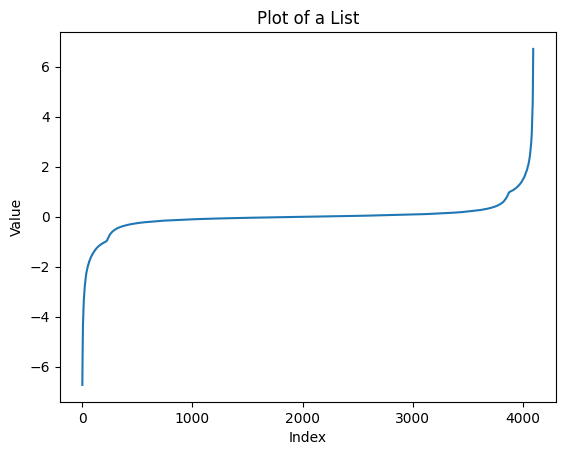

In [65]:
# Plot the data
# plt.plot(ev.cpu())
plt.plot(npev)

# Add labels and a title for clarity
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Plot of a List")

# Display the plot
plt.show()

In [16]:
with open("../sk/inversion_matrices/llama8b/lrr_matrix_2way_norm.pkl", 'rb') as file:
    lrr_matrix_2way_norm = pickle.load(file)

/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [17]:
for l in lrr_matrix_2way_norm:
    M = lrr_matrix_2way_norm[l].to(dtype=torch.float64)

    print(torch.norm(M@M - torch.eye(M.shape[0]).to("cuda")))
    # eigenvaluest, _ = torch.lobpcg(M, k=5, largest=True)
    # eigenvaluesb, _ = torch.lobpcg(M, k=5, largest=False)
    # print(eigenvaluest)
    # print(eigenvaluesb)
    # print("*"*50)

tensor(60.6382, device='cuda:0', dtype=torch.float64)
tensor(63.2982, device='cuda:0', dtype=torch.float64)
tensor(110.2197, device='cuda:0', dtype=torch.float64)
tensor(70.9950, device='cuda:0', dtype=torch.float64)
tensor(77.4993, device='cuda:0', dtype=torch.float64)
tensor(75.6987, device='cuda:0', dtype=torch.float64)
tensor(75.3770, device='cuda:0', dtype=torch.float64)
tensor(75.7558, device='cuda:0', dtype=torch.float64)
tensor(70.9874, device='cuda:0', dtype=torch.float64)
tensor(70.7150, device='cuda:0', dtype=torch.float64)
tensor(74.4075, device='cuda:0', dtype=torch.float64)
tensor(77.9062, device='cuda:0', dtype=torch.float64)
tensor(76.0136, device='cuda:0', dtype=torch.float64)
tensor(76.1920, device='cuda:0', dtype=torch.float64)
tensor(76.1113, device='cuda:0', dtype=torch.float64)
tensor(82.2561, device='cuda:0', dtype=torch.float64)
tensor(81.0845, device='cuda:0', dtype=torch.float64)
tensor(87.6042, device='cuda:0', dtype=torch.float64)
tensor(89.0243, device='cud

In [ ]:
for l in lrr_matrix_2way_norm:
    M = lrr_matrix_2way_norm[l].to(dtype=torch.float64)

    print(torch.norm(M@M - torch.eye(M.shape[0]).to("cuda")))
    # eigenvaluest, _ = torch.lobpcg(M, k=5, largest=True)
    # eigenvaluesb, _ = torch.lobpcg(M, k=5, largest=False)
    # print(eigenvaluest)
    # print(eigenvaluesb)
    # print("*"*50)